# Exploration du fichier des locations (tous départements)

In [1]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


## Import des données brutes
> Pour des rainsons de performances, nous n'en importons que 50 %

In [2]:
folder_path = '../data/raw/Rentals'
output_file = os.path.join(folder_path, 'merged_rentals_data.csv')

chunksize = 100000  # Number of rows per chunk
chunks = pd.read_csv(output_file, sep=';', chunksize=chunksize, index_col=None, low_memory=False)

# Process chunks
df_rentals = pd.concat(chunk for chunk in chunks)

# Reduce dataset size by sampling (e.g., 10% of the data)
df_rentals = df_rentals.sample(frac=0.5, random_state=42)

df_rentals.head()

,idannonce,type_annonceur,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,prix_bien,prix_maison,...,date,INSEE_COM,IRIS,CODE_IRIS,TYP_IRIS_x,TYP_IRIS_y,GRD_QUART,UU2010,REG,DEP
2452923,ics-2ri_2RIMMO_loc-LAPP23715,pr,a,l,2,44,NaN,2,601,NaN,...,2020-12,44162,401,441620401,H,H,4416201,44701,52,44
1411571,pericles-4278881,pr,m,l,0,83,NaN,4,800,NaN,...,2021-08,81004,803,810040803,H,H,8100401,81502,76,81
1698005,148918107,pr,a,l,0,45,NaN,2,820,NaN,...,2019-07,94016,104,940160104,H,H,9401601,851,11,94
2967089,162873405,pr,a,l,0,24,NaN,1,1400,NaN,...,2020-09,75101,203,751010203,H,H,7510101,851,11,75
286338,orpi-1-112004E2TV7N,pr,m,l,0,88,300.0,4,1100,NaN,...,2023-09,26198,402,261980402,H,H,2619801,551,84,26


### Valeurs manquantes (NAN)

In [3]:
missing_data_percentage_rentals = df_rentals.isna().sum()*100/len(df_rentals)

missing_value_percentage_rentals = pd.DataFrame({'column_name': df_rentals.columns,
                                         'percent_missing': missing_data_percentage_rentals,
                                         'dtypes':df_rentals.dtypes}
                                         ).sort_values(by='percent_missing', ascending=False)

# Resetting the index to start from 1 for better readability
# and to match the original DataFrame's index
missing_value_percentage_rentals.index = range(1, len(missing_value_percentage_rentals) + 1)

display(missing_value_percentage_rentals)

,column_name,percent_missing,dtypes
1,prix_maison,100.000000,float64
2,charges_copro,100.000000,float64
3,prix_terrain,100.000000,float64
4,parking,99.979564,object
5,nb_logements_copro,99.786632,float64
6,videophone,98.642667,object
7,surface_balcon,97.917528,float64
8,surface_terrain,94.383392,float64
9,nb_terraces,76.526769,float64
10,annee_construction,76.165268,float64


### Visualisation des NAN

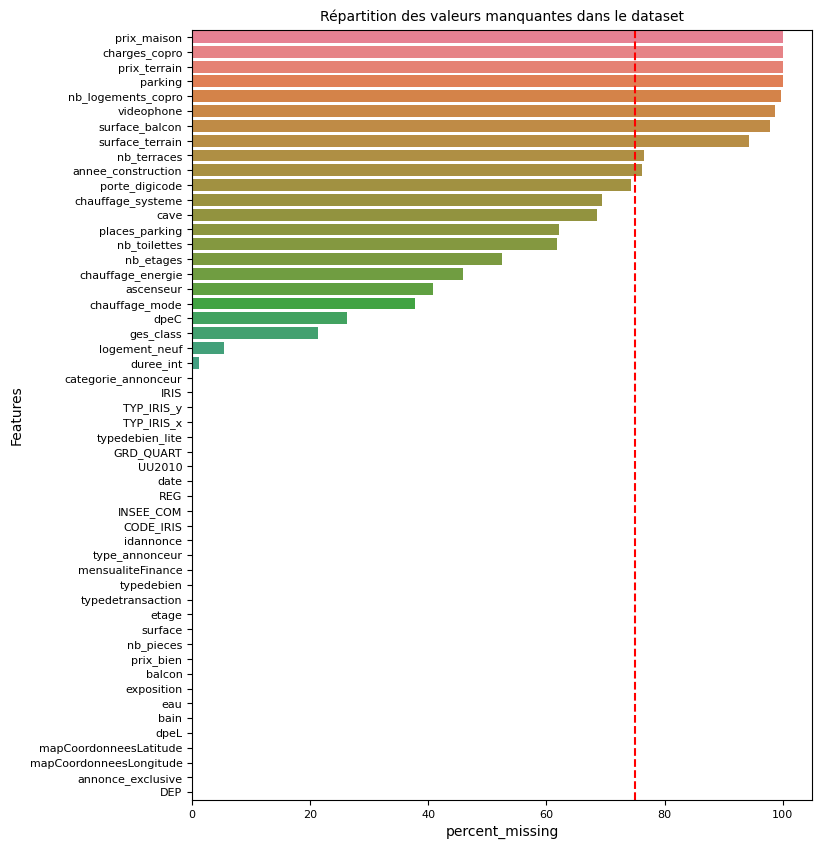

In [4]:
plt.figure(figsize=(8, 10)) 

sns.barplot(y = missing_value_percentage_rentals.column_name, 
            x = missing_value_percentage_rentals.percent_missing, 
            hue = missing_value_percentage_rentals.column_name, 
            order = missing_value_percentage_rentals.column_name)

# Add a vertical line at x=50 (adjust as needed)
plt.axvline(x=75, color='red', linestyle='--', label='Threshold (75%)')

plt.title('Répartition des valeurs manquantes dans le dataset', fontsize=10)

plt.xticks(fontsize=8)  
plt.yticks(fontsize=8)  
plt.ylabel('Features');

### Seuil des valeurs manquantes supérieur à 75 %

> Dans notre dataset, on constate que la grande diversité des variables. Cette grande diversité nous permet de faire le choix d'éliminer certaines variables qui représentent peu d'enjeux dans la prédiction de notre modèle, par exemple la surface du balcon. D'autres variables sont redondantes. Arbitrairement, le seuil de valeurs manquantes que nous choisirons sera de 75 % de valeurs manquantes dans la variable.

In [5]:
missing_values = df_rentals.isnull().mean()

variables_to_keep = missing_values[missing_values <= 0.75].index
print(variables_to_keep)

Index(['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction',
       'etage', 'surface', 'nb_pieces', 'prix_bien', 'mensualiteFinance',
       'balcon', 'eau', 'bain', 'dpeL', 'dpeC', 'mapCoordonneesLatitude',
       'mapCoordonneesLongitude', 'annonce_exclusive', 'nb_etages',
       'places_parking', 'cave', 'exposition', 'ges_class', 'nb_toilettes',
       'porte_digicode', 'ascenseur', 'chauffage_energie', 'chauffage_systeme',
       'chauffage_mode', 'categorie_annonceur', 'logement_neuf', 'duree_int',
       'typedebien_lite', 'date', 'INSEE_COM', 'IRIS', 'CODE_IRIS',
       'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 'DEP'],
      dtype='object')


### Mise à jour du dataset avec seulement les variables à garder.

In [ ]:
df_rentals["date"] = pd.to_datetime(df_rentals["date"], format='%Y-%m')
df_rentals = df_rentals[variables_to_keep]

# # Save the cleaned data
# folder_path_clean = '../data/processed/Rentals'
# output_file_clean = os.path.join(folder_path_clean, 'merged_rentals_data_clean.csv')
# df_rentals.to_csv(output_file_clean, index=False)

df_rentals.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1732220 entries, 2452923 to 906459
Data columns (total 42 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   idannonce                1732220 non-null  object        
 1   type_annonceur           1732220 non-null  object        
 2   typedebien               1732220 non-null  object        
 3   typedetransaction        1732220 non-null  object        
 4   etage                    1732220 non-null  int64         
 5   surface                  1732220 non-null  int64         
 6   nb_pieces                1732220 non-null  int64         
 7   prix_bien                1732220 non-null  int64         
 8   mensualiteFinance        1732220 non-null  int64         
 9   balcon                   1732220 non-null  int64         
 10  eau                      1732220 non-null  int64         
 11  bain                     1732220 non-null  int64         
 12  

# Dataviz

### Modalités des variables catégorielles ( moins de 10 modalités )

In [8]:
# Combine object and numerical columns
columns_to_check = df_rentals.select_dtypes(include=['object', 'int64', 'float64']).columns

columns_checked = []

# Iterate through each column and filter unique values with less than 10, excluding NaN
for col in columns_to_check:
    unique_values = df_rentals[col].dropna().unique()  # Exclude NaN values
    if len(unique_values) < 10:
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)
        columns_checked.append(col)


Column: type_annonceur
Unique Values: ['pr' 'pa']
--------------------------------------------------
Column: typedebien
Unique Values: ['a' 'm' 'l' 'd' 'h']
--------------------------------------------------
Column: typedetransaction
Unique Values: ['l' 'lt']
--------------------------------------------------
Column: mensualiteFinance
Unique Values: [  0  70  91  78 112 751  83]
--------------------------------------------------
Column: annonce_exclusive
Unique Values: ['0' 'Non' 'Oui']
--------------------------------------------------
Column: cave
Unique Values: [False True]
--------------------------------------------------
Column: porte_digicode
Unique Values: [False True]
--------------------------------------------------
Column: ascenseur
Unique Values: [True False]
--------------------------------------------------
Column: chauffage_mode
Unique Values: ['Collectif' 'Individuel' 'Central' 'Collectif, Central'
 'Collectif, Individuel' 'Individuel, Central'
 'Collectif, Individuel,

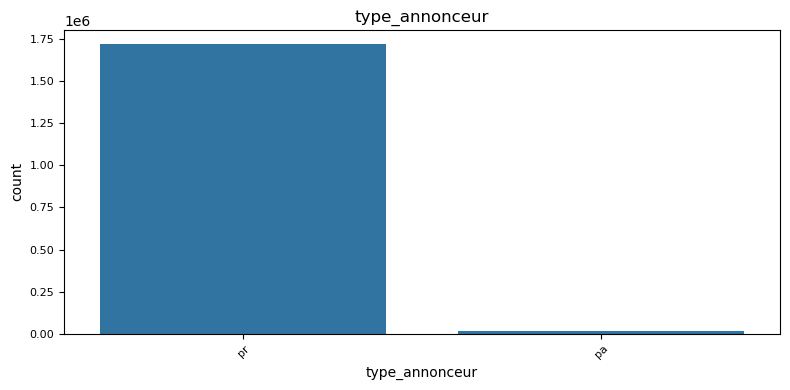

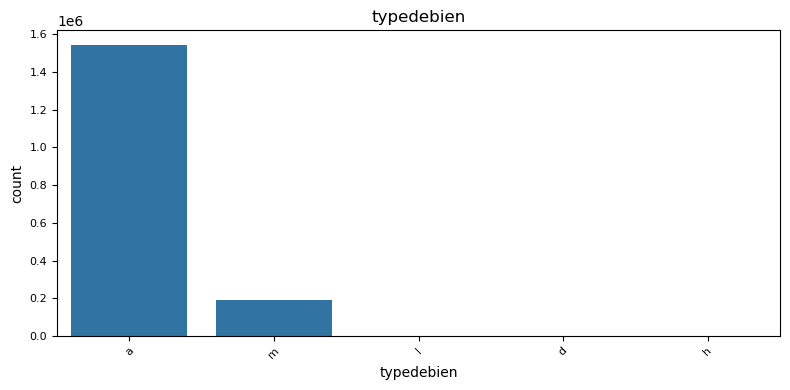

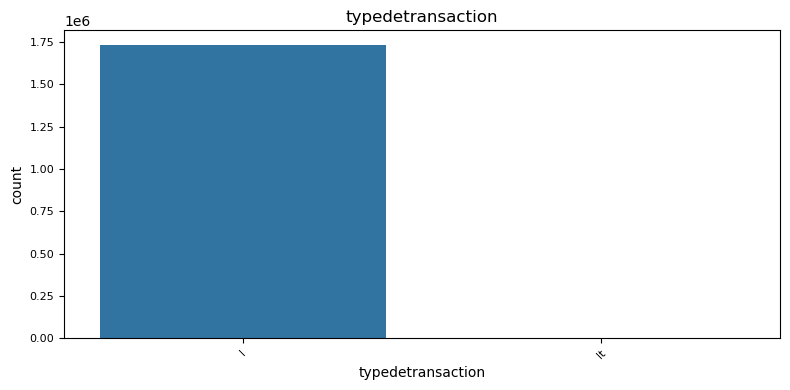

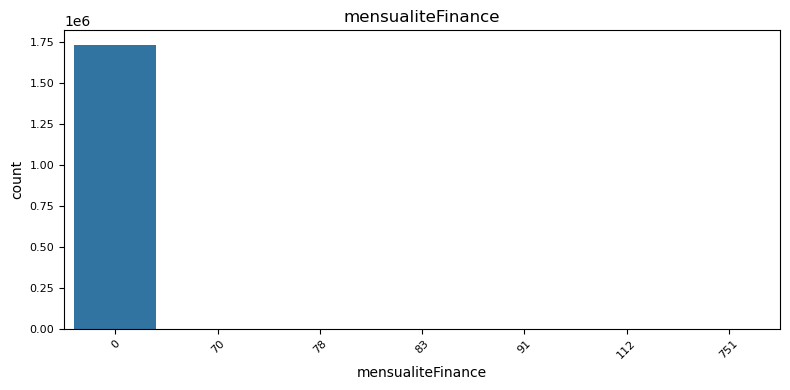

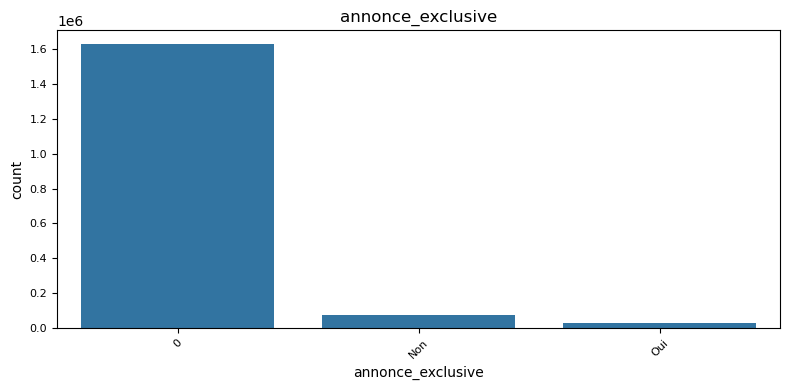

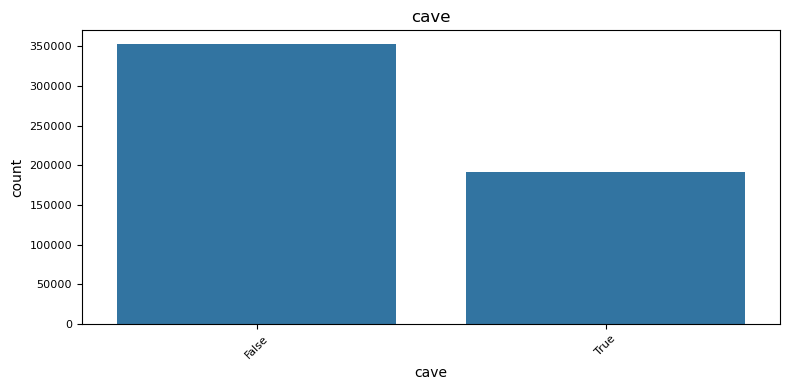

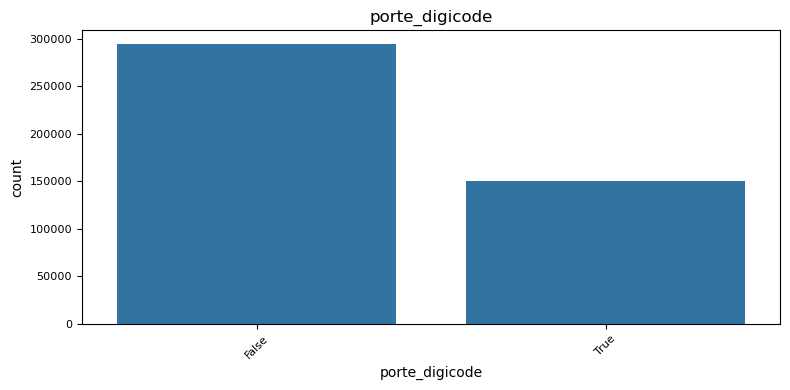

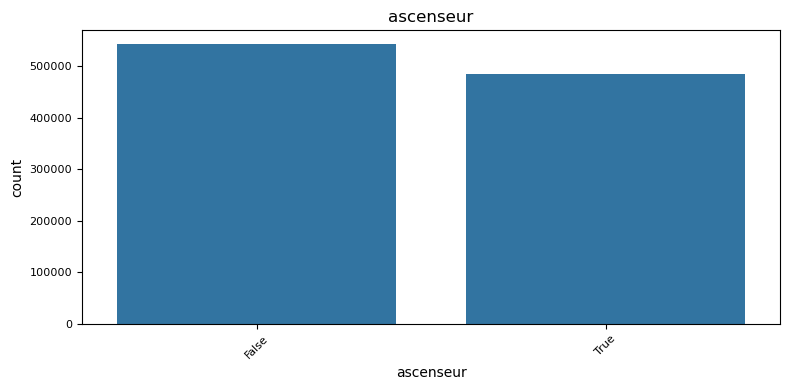

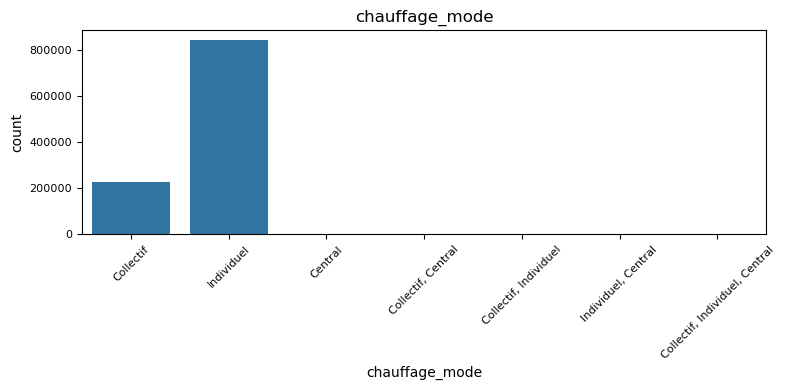

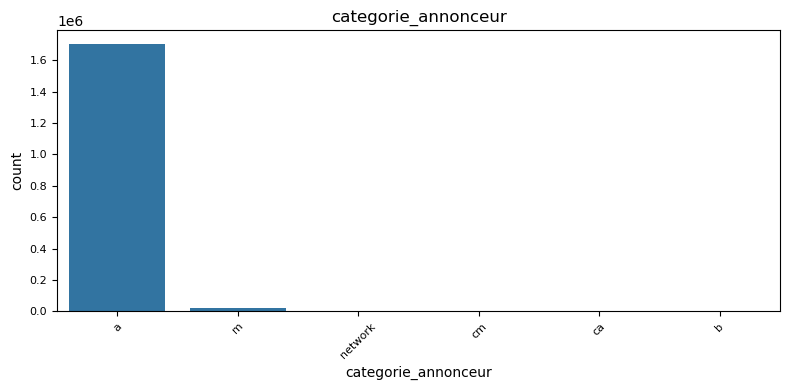

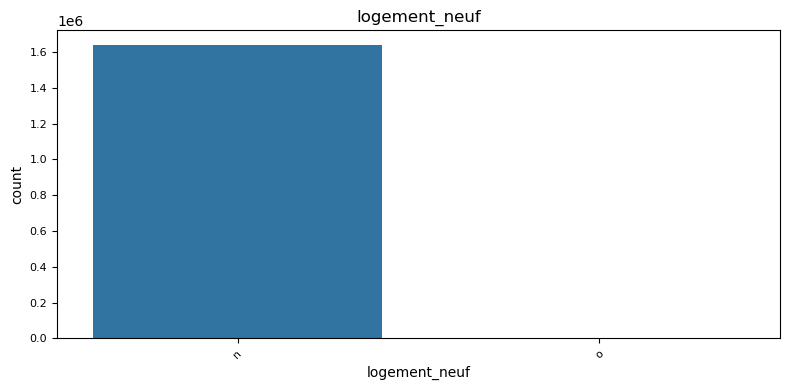

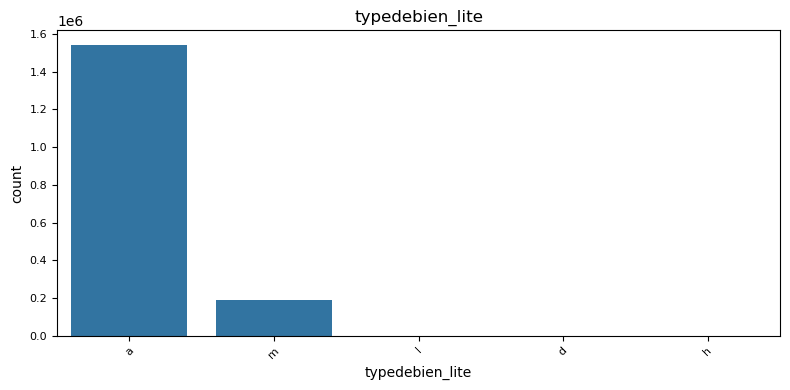

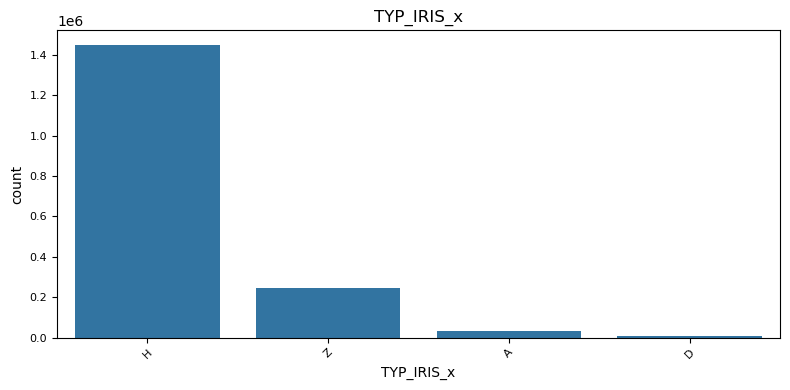

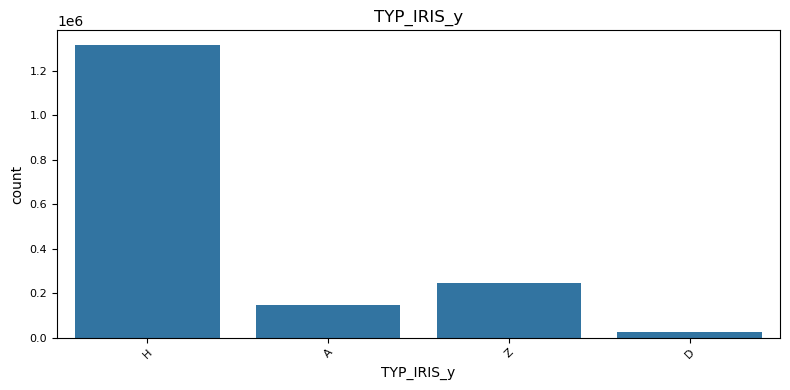

In [9]:
for var_to_viz in columns_checked:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_rentals, x=var_to_viz)
    plt.title(f'{var_to_viz}')
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

### Modalités des autres variables ( plus de 10 modalités )

In [10]:
columns_investigated = columns_checked
df_rentals_remaining = df_rentals.drop(columns_investigated,axis=1)

columns_to_check = df_rentals_remaining.select_dtypes(include=['object']).columns
columns_checked = []

# Iterate through each column and filter unique values with less than 10, excluding NaN
for col in columns_to_check:
    unique_values = df_rentals_remaining[col].dropna().unique()  # Exclude NaN values
    if len(unique_values) > 10:
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 50)
        columns_checked.append(col)

Column: idannonce
Unique Values: ['ics-2ri_2RIMMO_loc-LAPP23715' 'pericles-4278881' '148918107' ...
 '160826745' 'century-21-202_3627_7011'
 'square-habitat-seiitra-sqh06_bi_nic2-37090']
--------------------------------------------------
Column: dpeL
Unique Values: ['B' 'C' '0' 'D' 'F' 'E' 'VI' 'NS' 'G' 'A' 'Blank' 'A kWh/m².year'
 'E kWh/m².year' '37' 'D kWh/m².year' 'B kWh/m².year']
--------------------------------------------------
Column: exposition
Unique Values: ['0' 'Sud' 'Sud-Est' 'Est' 'Est-Ouest' 'Nord' 'Ouest' 'Nord-est' 'sud-est'
 'Sud-Ouest' 'Nord-Sud' 'Nord-Ouest' 'sud-ouest' 'Nord-ouest' 'Nord-Est'
 'nord-ouest / sud-est' 'Sud-Est-Ouest' 'Nord Sud Est Ouest'
 'Nord Sud Est' 'Traversant-Est-Ouest' 'nord,ouest' 'EST' 'SUD EST'
 'Nord Sud Ouest' 'Nord Est Ouest' 'SUD' 'traversant' 'SO' 'E-O'
 'Sud Sud-ouest' 'traversant nord-sud' 'EST-ouest' 'sud,ouest' '360°'
 'nord-est / sud-ouest' 'OUEST' 'EST OUEST' 'SUD/OUEST' 'Sud/Est'
 'NORD-EST' 'Sud / Nord' 'EST-OUEST' 'SUD-EST' 'o

### Distribution des variables quantitatives

In [11]:
df_rentals_remaining = df_rentals_remaining.drop(columns_checked,axis=1)
df_rentals_remaining.describe()

,etage,surface,nb_pieces,prix_bien,balcon,eau,bain,dpeC,mapCoordonneesLatitude,mapCoordonneesLongitude,nb_etages,places_parking,nb_toilettes,duree_int,date,IRIS,REG
count,1.732220e+06,1.732220e+06,1.732220e+06,1.732220e+06,1.732220e+06,1.732220e+06,1.732220e+06,1.277871e+06,1.732220e+06,1.732220e+06,823986.000000,656416.000000,662665.000000,1.711277e+06,1732220,1.732220e+06,1.732220e+06
mean,2.189579e+00,5.582485e+01,2.515506e+00,8.466994e+02,1.950260e-01,3.743306e-01,4.680826e-01,1.770470e+03,4.627396e+01,2.636513e+00,3.919493,2.672211,1.140732,-1.607877e+02,2022-03-03 12:21:51.995936512,7.076935e+02,5.181181e+01
min,-2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-6.200000e+01,-2.137770e+01,-6.180724e+01,-1.000000,0.000000,0.000000,-1.125000e+03,2019-04-01 00:00:00,0.000000e+00,1.000000e+00
25%,0.000000e+00,3.500000e+01,2.000000e+00,5.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.310000e+02,4.389129e+01,1.456950e+00,2.000000,0.000000,1.000000,1.000000e+00,2020-09-01 00:00:00,1.020000e+02,2.400000e+01
50%,1.000000e+00,5.000000e+01,2.000000e+00,6.950000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e+02,4.719918e+01,2.451140e+00,3.000000,1.000000,1.000000,1.200000e+01,2022-02-01 00:00:00,1.110000e+02,5.200000e+01
75%,2.000000e+00,6.900000e+01,3.000000e+00,9.180000e+02,0.000000e+00,1.000000e+00,1.000000e+00,2.670000e+02,4.883288e+01,4.868540e+00,5.000000,1.000000,1.000000,2.900000e+01,2023-09-01 00:00:00,6.010000e+02,7.600000e+01
max,1.748700e+04,1.000000e+03,7.100000e+01,1.297000e+06,2.134000e+03,2.950000e+02,1.111100e+04,1.001010e+09,5.108201e+01,5.573383e+01,61880.000000,977299.000000,11960.000000,9.560000e+02,2025-02-01 00:00:00,9.901000e+03,9.400000e+01
std,3.354169e+01,3.100476e+01,1.215763e+00,2.291297e+03,2.055918e+00,6.661206e-01,8.719942e+00,1.252304e+06,4.677689e+00,6.089572e+00,113.208506,1206.572256,15.566952,3.813346e+02,NaN,1.396878e+03,3.081719e+01


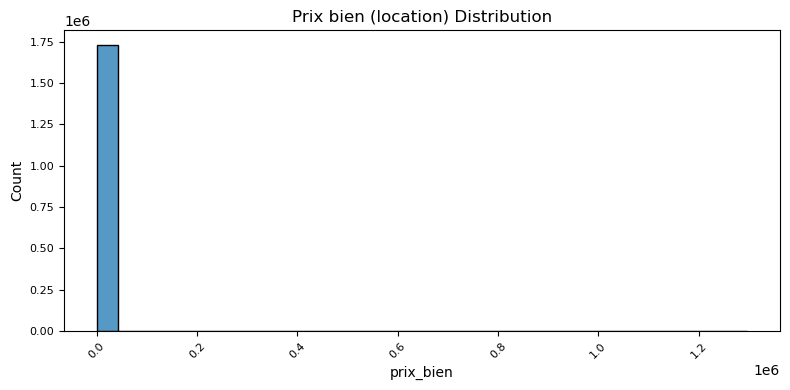

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_rentals_remaining, x='prix_bien', bins=30)
plt.title('Prix bien (location) Distribution')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

> Il est problable qu'il y ait eu un problème de collectecte et la présence d'outliners

In [13]:
# Calculate the IQR for 'valeur_fonciere'
Q1 = df_rentals_remaining["prix_bien"].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_rentals_remaining["prix_bien"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_rentals_remaining = df_rentals_remaining[(df_rentals_remaining["prix_bien"] >= lower_bound) & (df_rentals_remaining["prix_bien"] <= upper_bound)]

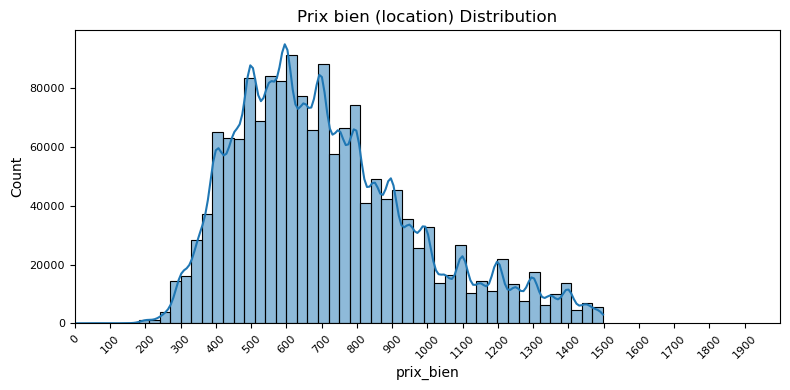

In [14]:
import numpy as np
plt.figure(figsize=(8, 4))
sns.histplot(data=df_rentals_remaining, x='prix_bien', bins=50, kde=True)
plt.title('Prix bien (location) Distribution')
tick_positions = np.arange(0, 2000, 100)
plt.xticks(tick_positions, rotation=45, fontsize=8)
plt.xlim(0, 2000)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

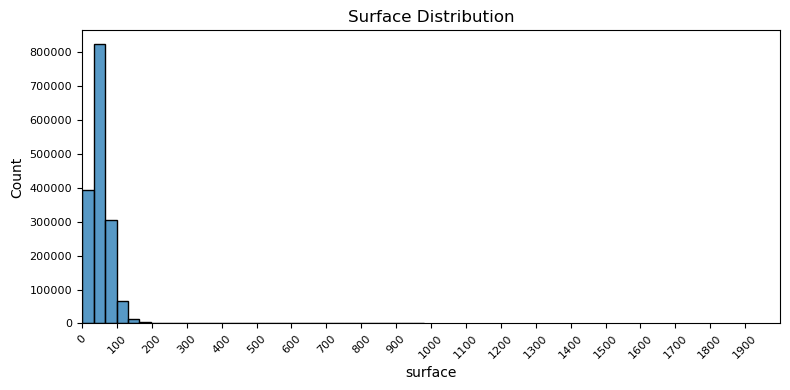

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_rentals_remaining, x='surface', bins=30)
plt.title('Surface Distribution')
tick_positions = np.arange(0, 2000, 100)
plt.xticks(tick_positions, rotation=45, fontsize=8)
plt.xlim(0, 2000)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

> Il est problable qu'il y ait eu un problème de collectecte et la présence d'outliners

In [16]:
# Calculate the IQR for 'surface'
Q1 = df_rentals_remaining["surface"].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_rentals_remaining["surface"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_rentals_remaining = df_rentals_remaining[(df_rentals_remaining["surface"] >= lower_bound) & (df_rentals_remaining["surface"] <= upper_bound)]

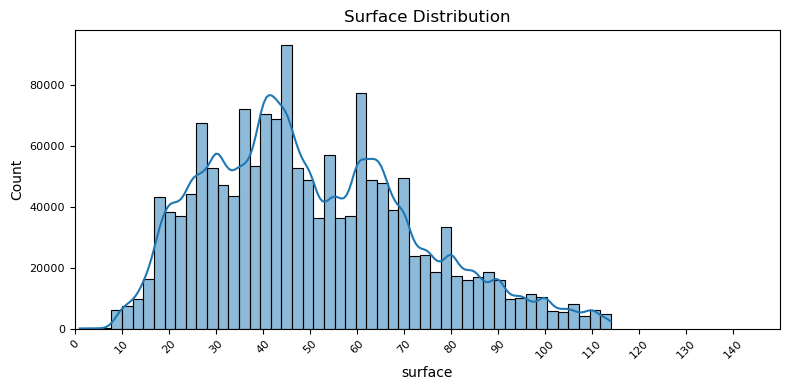

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_rentals_remaining, x='surface', bins=50, kde=True)
plt.title('Surface Distribution')
tick_positions = np.arange(0, 150, 10)
plt.xticks(tick_positions, rotation=45, fontsize=8)
plt.xlim(0, 150)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

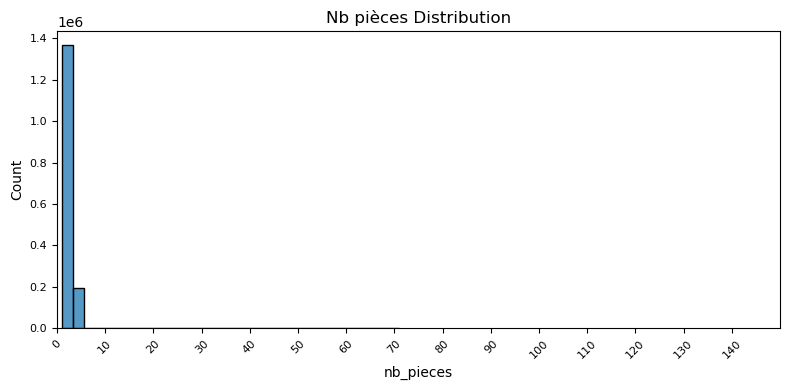

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_rentals_remaining, x='nb_pieces', bins=30,)
plt.title('Nb pièces Distribution')
tick_positions = np.arange(0, 150, 10)
plt.xticks(tick_positions, rotation=45, fontsize=8)
plt.xlim(0, 150)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

> Il est problable qu'il y ait eu un problème de collectecte et la présence d'outliners

In [19]:
# Calculate the IQR for 'nb_pieces'
Q1 = df_rentals_remaining["nb_pieces"].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_rentals_remaining["nb_pieces"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_rentals_remaining = df_rentals_remaining[(df_rentals_remaining["nb_pieces"] >= lower_bound) & (df_rentals_remaining["nb_pieces"] <= upper_bound)]

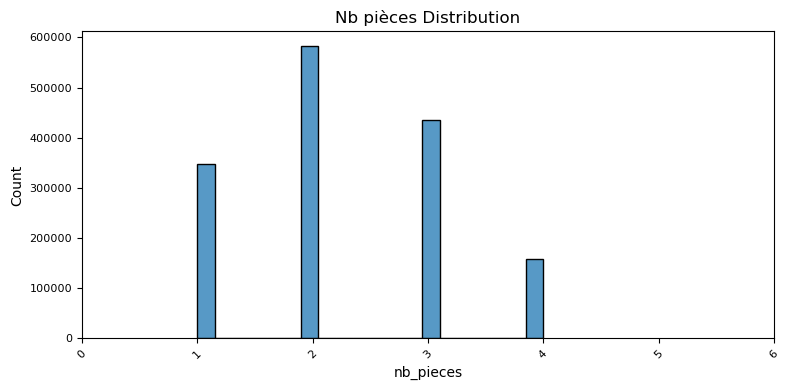

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_rentals_remaining, x='nb_pieces', bins=20)
plt.title('Nb pièces Distribution')
tick_positions = np.arange(0, 15, 1)
plt.xticks(tick_positions, rotation=45, fontsize=8)
plt.xlim(0, 6)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

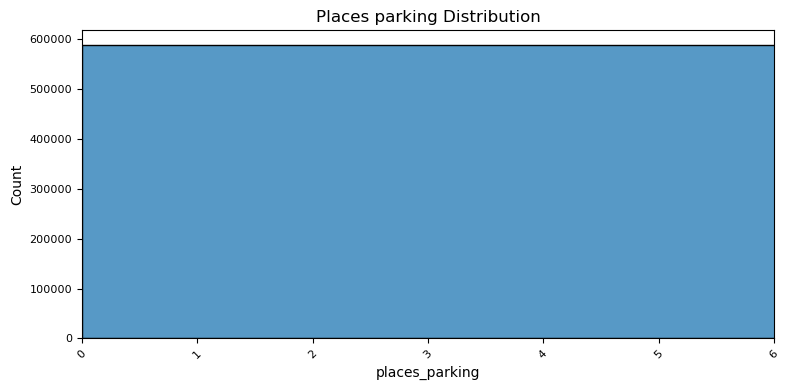

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_rentals_remaining, x='places_parking', bins=20)
plt.title('Places parking Distribution')
tick_positions = np.arange(0, 15, 1)
plt.xticks(tick_positions, rotation=45, fontsize=8)
plt.xlim(0, 6)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

> Il est problable qu'il y ait eu un problème de collectecte et la présence d'outliners

In [22]:
# Calculate the IQR for 'places_parking'
Q1 = df_rentals_remaining["places_parking"].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_rentals_remaining["places_parking"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_rentals_remaining = df_rentals_remaining[(df_rentals_remaining["places_parking"] >= lower_bound) & (df_rentals_remaining["places_parking"] <= upper_bound)]

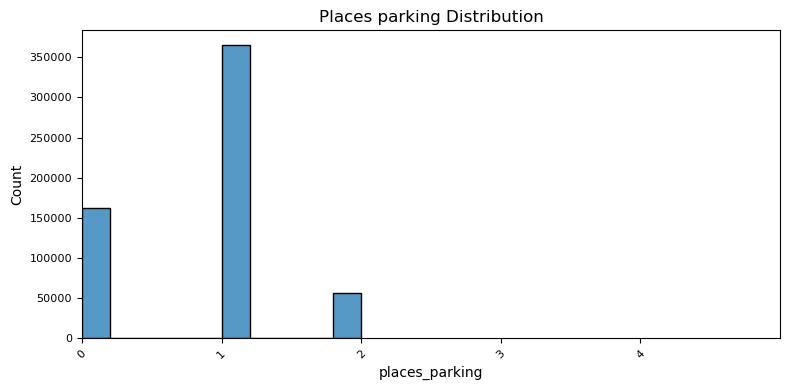

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_rentals_remaining, x='places_parking', bins=10)
plt.title('Places parking Distribution')
tick_positions = np.arange(0, 5, 1)
plt.xticks(tick_positions, rotation=45, fontsize=8)
plt.xlim(0, 5)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

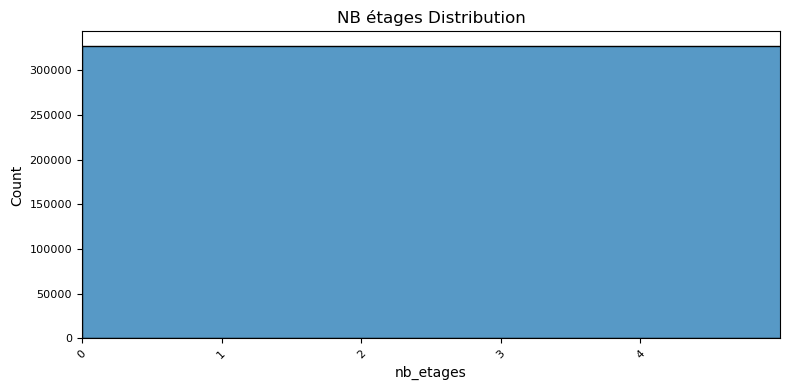

In [24]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_rentals_remaining, x='nb_etages', bins=10)
plt.title('NB étages Distribution')
tick_positions = np.arange(0, 5, 1)
plt.xticks(tick_positions, rotation=45, fontsize=8)
plt.xlim(0, 5)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

> Il est problable qu'il y ait eu un problème de collectecte et la présence d'outliners

In [25]:
# Calculate the IQR for 'nb_etages'
Q1 = df_rentals_remaining["nb_etages"].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_rentals_remaining["nb_etages"].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_rentals_remaining = df_rentals_remaining[(df_rentals_remaining["nb_etages"] >= lower_bound) & (df_rentals_remaining["nb_etages"] <= upper_bound)]

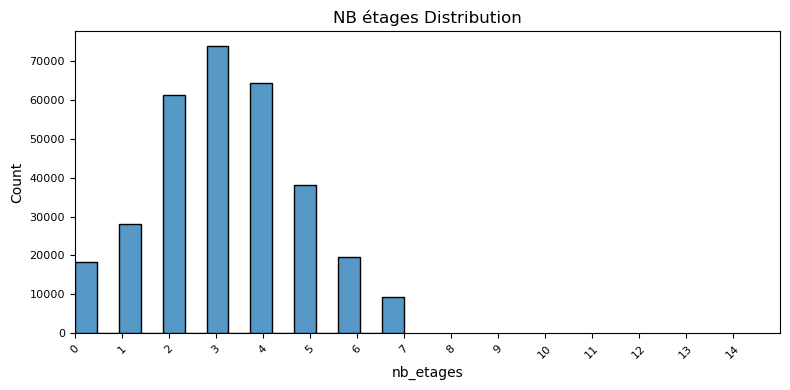

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_rentals_remaining, x='nb_etages', bins=15)
plt.title('NB étages Distribution')
tick_positions = np.arange(0, 15, 1)
plt.xticks(tick_positions, rotation=45, fontsize=8)
plt.xlim(0, 15)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()